Date
2022-01-19    0.000000
2022-01-20   -0.000393
2022-01-21    0.015116
2022-01-24   -0.000142
2022-01-25    0.035292
                ...   
2024-12-24    0.000618
2024-12-26   -0.000179
2024-12-27    0.001562
2024-12-30    0.003953
2024-12-31    0.002237
Length: 742, dtype: float64
                                 Open        High         Low       Close  \
Date                                                                        
2022-01-19 00:00:00-05:00  435.839604  437.247576  429.494121  429.770020   
2022-01-20 00:00:00-05:00  431.672658  436.419858  422.872719  425.013245   
2022-01-21 00:00:00-05:00  423.881163  426.259525  416.641444  416.669983   
2022-01-24 00:00:00-05:00  411.009453  418.953187  400.287809  418.439453   
2022-01-25 00:00:00-05:00  411.989380  418.325340  406.366929  413.330780   
...                               ...         ...         ...         ...   
2024-12-23 00:00:00-05:00  587.381389  591.765177  584.170528  591.158813   
2024-12-24 00:00:00-0

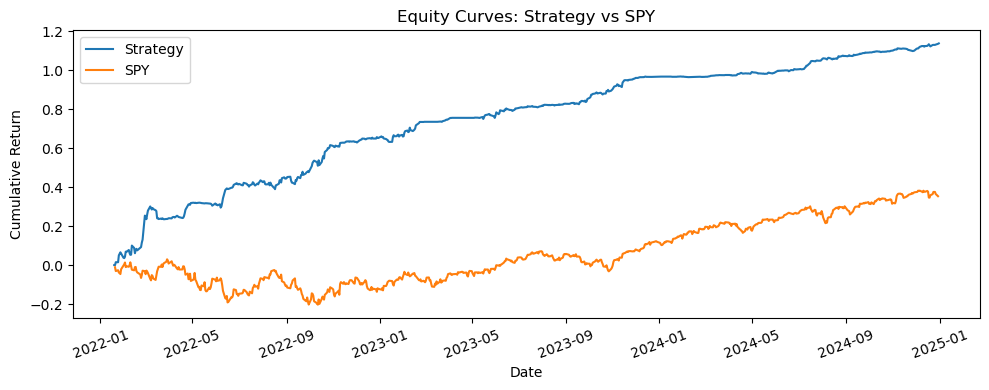

In [8]:
# 04_additional_tests.ipynb

import pickle
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# 1) Load saved strategy data
with open("../data/processed/strategy_data2.pkl", "rb") as f:
    sd = pickle.load(f)

portfolio_daily_ret = sd["daily_ret"]  # pandas Series, index = dates
print(portfolio_daily_ret)
# Option A: rebuild cum_return as Series
cum_return = portfolio_daily_ret.cumsum()

start = sd["start"]
end   = sd["end"]

# 2) Fetch SPY and compute its returns
spy = yf.Ticker("SPY").history(start=start, end=end)
print(spy)

# Fix: Normalize SPY index to match portfolio_daily_ret index format
spy.index = spy.index.date  # Convert timezone-aware datetime to date
spy_ret = spy["Close"].pct_change().reindex(portfolio_daily_ret.index).dropna()
print(spy_ret)

# 3) Correlation
aligned = pd.concat([portfolio_daily_ret, spy_ret], axis=1, join="inner")
aligned.columns = ["Strategy", "SPY"]
corr = aligned["Strategy"].corr(aligned["SPY"])
print(f"Correlation with SPY: {corr:.2f}")

# 4) Plot equity curves with proper dates
plt.figure(figsize=(10, 4))
plt.plot(cum_return, label="Strategy")
plt.plot(aligned["SPY"].cumsum(), label="SPY")
plt.legend()
plt.title("Equity Curves: Strategy vs SPY")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()
